<a href="https://colab.research.google.com/github/maevezhw/stroke-prediction/blob/main/Stroke%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Dataset 'Stroke Prediction' dengan Menggunakan Algoritma Decision Tree

**Maeve Zahwa Adriana Crown Zaki (21/477527/PA/20675)**



## Dataset Description
Dataset yang digunakan merupakan dataset untuk memprediksi apakah seseorang memiliki kemungkinan terkena **stroke** berdasarkan parameter-parameter tertentu. Dataset ini berjudul [**Stroke Prediction Dataset**](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) dengan sumber data ialah dari situs Kaggle. Dataset ini memuat satu file csv yang terdiri dari 5110 row dan 12 column.

Kolom/atribut yang terdapat pada dataset ini antara lain ialah 'id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', dan 'stroke'. Nilai yang akan diprediksi atau nilai targetnya ialah nilai dari kolom 'stroke', apakah 0 (tidak stroke) atau 1 (stroke)

## Import Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

Dataset harus diupload terlebih dahulu ke Google Colab tiap hendak memulai sesi. File dataset dapat diunduh melalui https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 dalam format csv, kemudian dapat diunggah di Google Colab.

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

## Data Understanding

Pada tahap ini, dataset akan diulik untuk mendapatkan informasi dasar mengenai data-data yang terdapat dalam dataset.

In [ ]:
# untuk mendapatkan overview terkait seperti apa bentuk data
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# untuk mengetahui ukuran data
data.shape

(5110, 12)

In [ ]:
# untuk mengetahui informasi terkait tiap atribut/kolom pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# untuk mengetahui apakah ada nilai null pada data
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# untuk mengetahui statistik dari data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Overview Fitur

#### Visualisasi Fitur

Text(0.5, 1.0, 'Married Status Frequency')

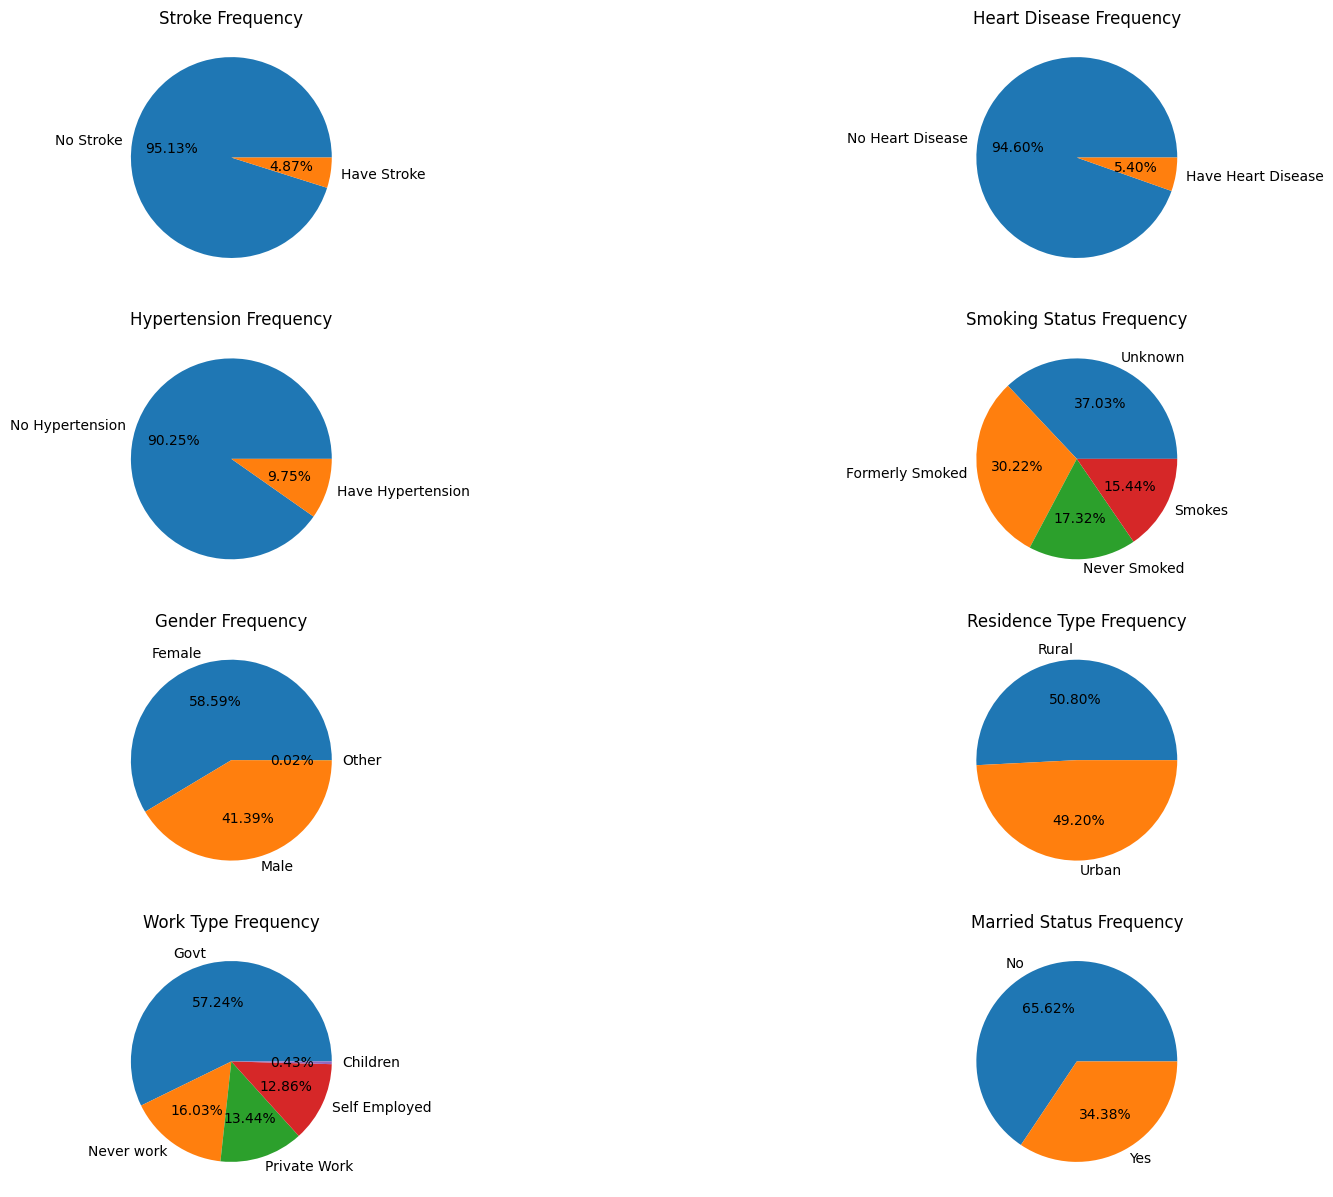

In [ ]:
# PERSENTASE NILAI DALAM TIAP FITUR

# mengatur axis untuk tiap baris dan kolom
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,15))

# plot tiap data ke axis yang diinginkan
ax1.pie(data['stroke'].value_counts(), labels=['No Stroke', 'Have Stroke'], autopct='%1.2f%%')
ax2.pie(data['heart_disease'].value_counts(), labels=['No Heart Disease', 'Have Heart Disease'], autopct='%1.2f%%')
ax3.pie(data['hypertension'].value_counts(), labels=['No Hypertension', 'Have Hypertension'], autopct='%1.2f%%')
ax4.pie(data['smoking_status'].value_counts(), labels=['Unknown', 'Formerly Smoked', 'Never Smoked', 'Smokes'], autopct='%1.2f%%')
ax5.pie(data['gender'].value_counts(), labels=['Female', 'Male', 'Other'], autopct='%1.2f%%')
ax6.pie(data['Residence_type'].value_counts(), labels=['Rural', 'Urban'], autopct='%1.2f%%')
ax7.pie(data['work_type'].value_counts(), labels=['Govt', 'Never work', 'Private Work', 'Self Employed', 'Children'], autopct='%1.2f%%')
ax8.pie(data['ever_married'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')

ax1.set_title('Stroke Frequency')
ax2.set_title('Heart Disease Frequency')
ax3.set_title('Hypertension Frequency')
ax4.set_title('Smoking Status Frequency')
ax5.set_title('Gender Frequency')
ax6.set_title('Residence Type Frequency')
ax7.set_title('Work Type Frequency')
ax8.set_title('Married Status Frequency')

Visualisasi di atas menunjukkan persentase dari nilai dalam delapan fitur yang ada pada dataset. Dari visualisasi di atas, dapat terlihat nilai-nilai mana yang dominan. Selain kedelapan fitur di atas, berikut overview dua fitur lainnya dalam bentuk histogram:

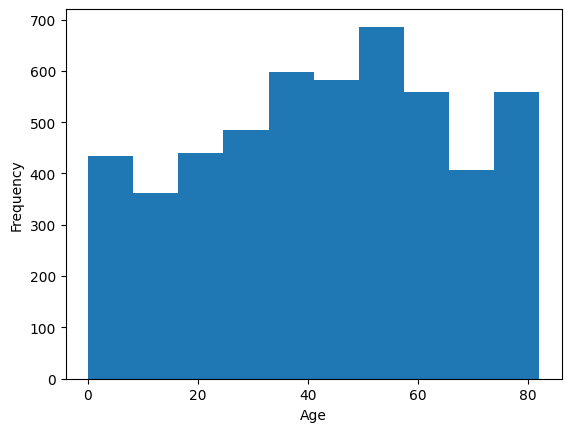

In [ ]:
# OVERVIEW FITUR AGE

data["age"].plot.hist()
plt.xlabel("Age");

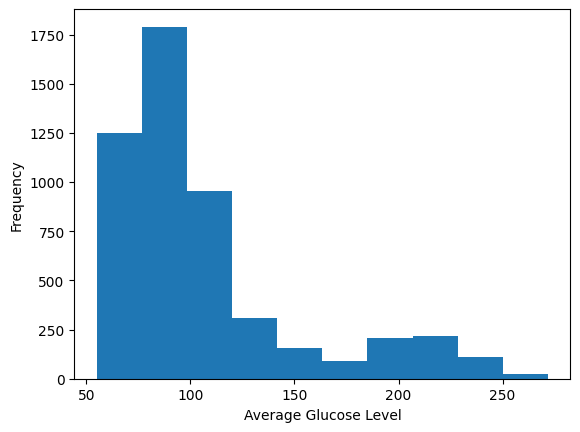

In [ ]:
# OVERVIEW FITUR AVG GLUCOSE LEVEL
data["avg_glucose_level"].plot.hist()
plt.xlabel("Average Glucose Level");

#### Visualisasi Hubungan dengan fitur Stroke

Di sini yang akan digambarkan visualisasi hubungannya dengan fitur Stroke hanya ada 7 fitur, dari visualisasi ini dapat dilihat kaitan antara tiap fitur dengan fitur Stroke dan bagaimana hubungannya.

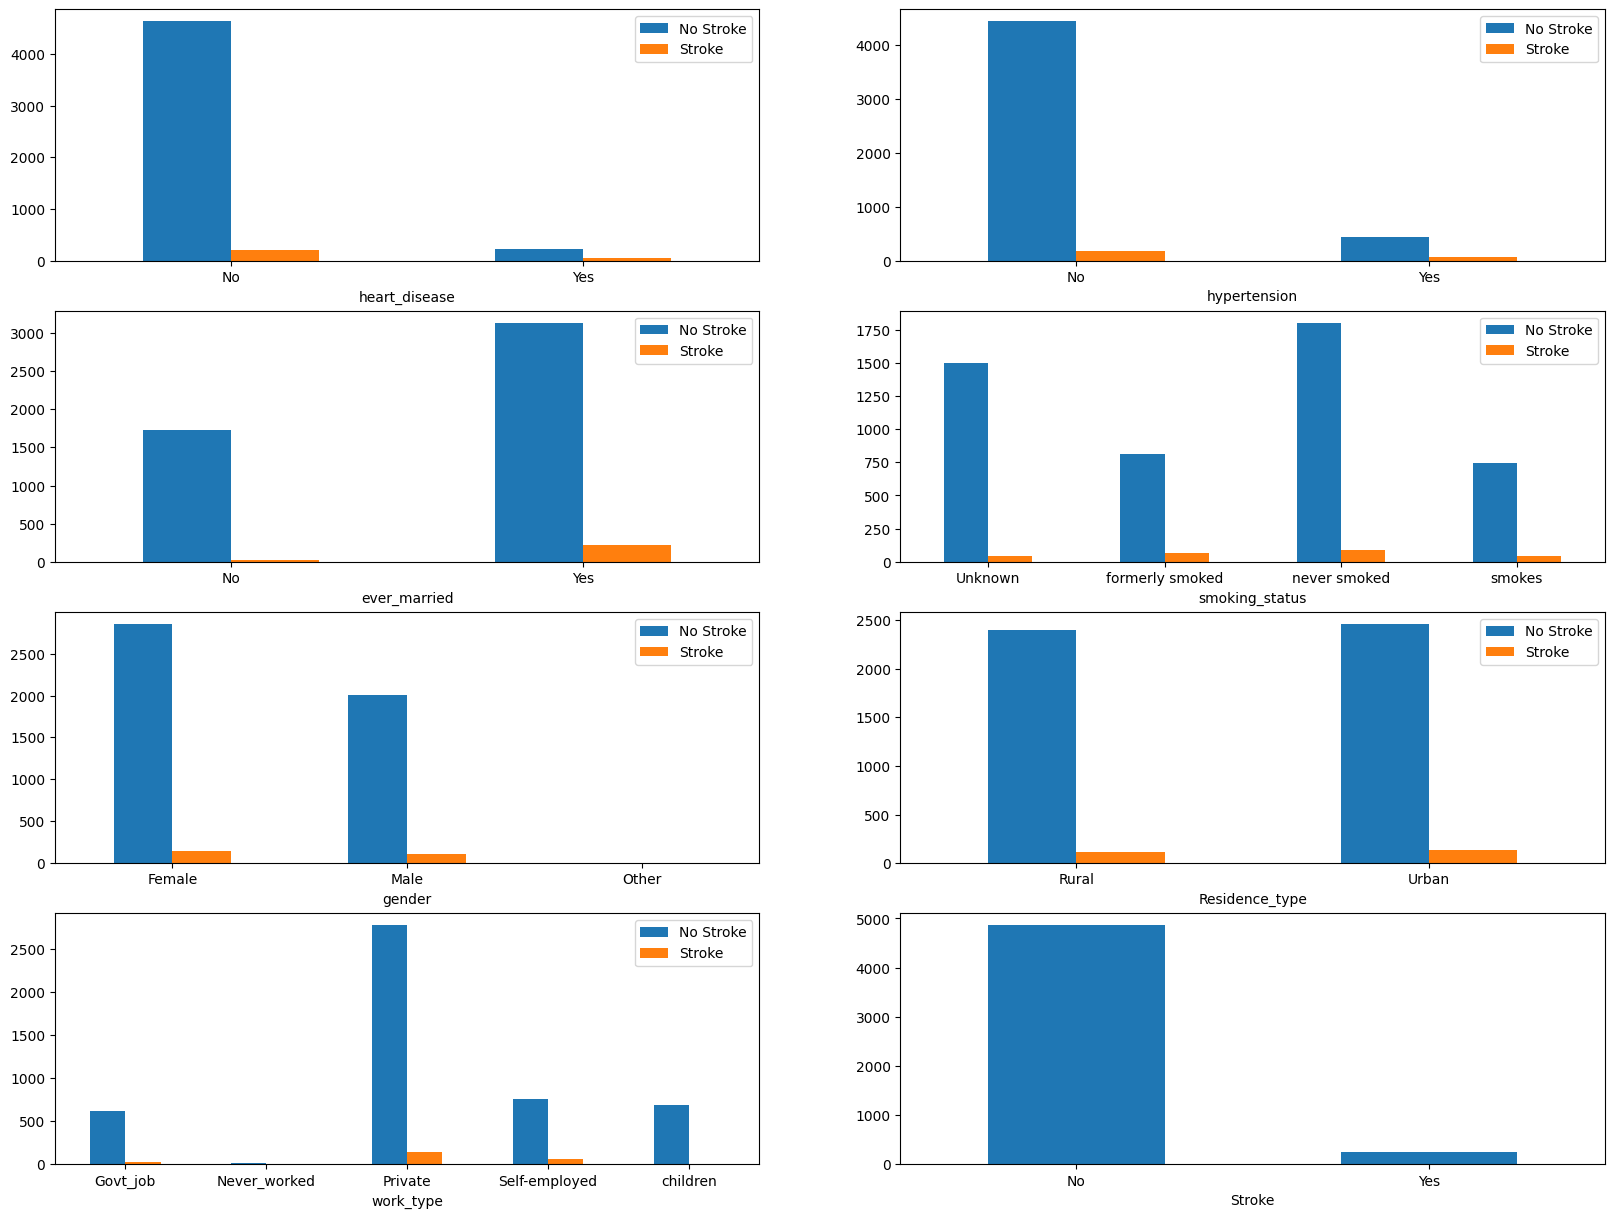

In [ ]:
# crosstab untuk melakukan operasi 'join' dalam bentuk count
ct1 = pd.crosstab(data.heart_disease,data.stroke)
ct2 = pd.crosstab(data.hypertension,data.stroke)
ct3 = pd.crosstab(data.ever_married,data.stroke)
ct4 = pd.crosstab(data.smoking_status,data.stroke)
ct5 = pd.crosstab(data.gender, data.stroke)
ct6 = pd.crosstab(data.Residence_type, data.stroke)
ct7 = pd.crosstab(data.work_type, data.stroke)
ct8 = data['stroke'].value_counts()

# Mengatur axis tiap baris dan kolom
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,15))

# Plot data ke axis yag diinginkan
ct1.plot(kind='bar',ax=ax1,rot=0)
ct2.plot(kind='bar',ax=ax2,rot=0)
ct3.plot(kind='bar',ax=ax3,rot=0)
ct4.plot(kind='bar',ax=ax4,rot=0)
ct5.plot(kind='bar',ax=ax5,rot=0)
ct6.plot(kind='bar',ax=ax6,rot=0)
ct7.plot(kind='bar',ax=ax7,rot=0)
ct8.plot(kind='bar',ax=ax8,rot=0)

# Set label nilai untuk variabel tertentu yang nilanya 0 dan 1
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])
ax8.set_xticklabels(["No","Yes"])
ax8.set_xlabel("Stroke")

# Set label untuk legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke'])
ax5.legend(labels=['No Stroke', 'Stroke'])
ax6.legend(labels=['No Stroke', 'Stroke'])
ax7.legend(labels=['No Stroke', 'Stroke'])

Berdasarkan informasi-informasi yang didapatkan pada tahap ini, ada beberapa hal penting yang perlu dilakukan sebelum melakukan modeling dan prediksi pada data, yakni:

1. Masih ada data yang bersifat kategorikal (object), yakni data pada atribut 'gender', 'ever_married', 'work_type', 'residence_type', dan 'smoking_status'
2. Range nilai dari tiap kolom berbeda-beda, seperti kolom 'age' berada di rentang puluhan, sementara 'avg_glucose_level' di rentang ratusan
3. Ada kolom yang memiliki nilai null, yakni kolom 'bmi'
4. Hasil akhir prediksi, yakni kolom 'stroke', memiliki hasil yang tidak seimbang

Karena akan menggunakan algoritma Decision Tree untuk modeling, permasalahan nomor 2 tidak perlu diselesaikan menggunakan Feature Scaling, karena menurut Alice Zheng dalam 'Feature Engineering on Machine Learning', Feature Scaling tidak berpengaruh pada Decision Tree.

Sementara itu, untuk mengatasi permasalahan nomor 1 dan 3, akan dilakukan transformasi dan normalisasi data pada tahap 'Data Preparation'. Untuk permasalahan nomor 4 dapat diatasi dengan cara melakukan oversampling, nantinya model yang dibuat dengan oversampling ini akan saya bandingkan dengan model dari data awal.

## Data Preparation

### Feature Transformation

#### Encoding Categorical Feature

Fitur-fitur yang masih bersifat kategorikal perlu diubah agar mempermudah proses prediksi nantinya. Oleh karena itu, digunakanlah encoding sebagai salah satu cara untuk merubah nilai kategorikal menjadi nilai numerik. Kali ini, jenis encoding yang akan digunakan adalah ordinal encoding

In [ ]:
# daftar fitur yang masih merupakan object/bersifat kategorikal
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df = data.copy()

# Melakukan encoding data kategorikal menjadi ordinal yg bersifat numerikal
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(data[object_cols])

print(df.head())


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1           1.0        2.0   
1  51676     0.0  61.0             0              0           1.0        3.0   
2  31112     1.0  80.0             0              1           1.0        2.0   
3  60182     0.0  49.0             0              0           1.0        2.0   
4   1665     0.0  79.0             1              0           1.0        3.0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0             1.0             228.69  36.6             1.0       1  
1             0.0             202.21   NaN             2.0       1  
2             0.0             105.92  32.5             2.0       1  
3             1.0             171.23  34.4             3.0       1  
4             0.0             174.12  24.0             2.0       1  


#### Data Imputation
Untuk mengisi nilai null yang ada pada fitur BMI, dilakukanlah tahap imputasi data. Imputasi data yang dilakukan di sini menggunakan bantuan library, di mana nantinya nilai null yang ada pada atribut BMI akan diganti nilainya menjadi nilai dari BMI rata-rata (mean).

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
df_imputed = pd.DataFrame(my_imputer.fit_transform(df))

# Menuliskan kembali nama kolom/atribut yang dihilangkan oleh imputer
df_imputed.columns = df.columns

df_imputed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.893237,2.0,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0


In [ ]:
# cek apakah nilai null sudah hilang semua

df_imputed.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Data Splitting

Setelah proses transformasi pada dataset, kini dataset sudah cukup siap untuk diproses dan dimodeling. Oleh karena itu, data perlu dipisahkan menjadi dua jenis, yakni fitur penentu (X) dan target (y).

Pada dataset ini, sudah jelas bahwasanya target prediksinya ialah atribut 'stroke' yang menentukan apakah seseorang mengidap stroke atau tidak. Sementara itu, untuk fitur penentu bisa ditentukan menggunakan bantuan tools untuk feature selection seperti Pearson's Correlation Coefficient. Akan tetapi, untuk kali ini saya akan menggunakan heatmap korelasi yang lebih sederhana.


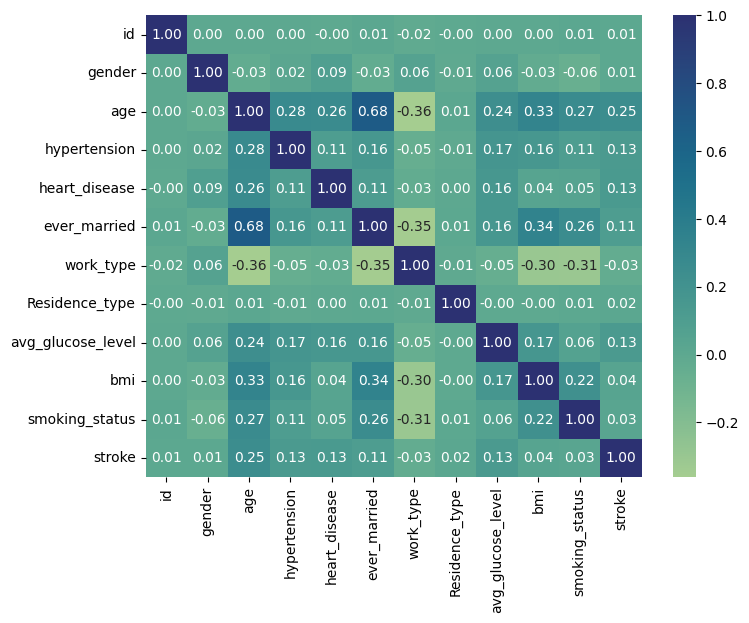

In [ ]:
import seaborn as sns
corr_matrix = df_imputed.corr()

# plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=('crest'), ax=ax, fmt='.2f')
plt.show()

Dari heatmap korelasi ini, dapat dilihat bahwasanya korelasi antara fitur 'id' dan fitur 'work_type' sangat kecil, sehingga kedua fitur tersebut dapat dikecualikan dari fitur penentu.

In [ ]:
X = df_imputed.drop(['id', 'work_type', 'stroke'], axis = 1)
y = df_imputed.stroke

# mengubah data object cols, mempermudah mengubah nilai numerikal ke kategorikal lagi
object_cols.remove('work_type')
df_imputed[object_cols] = ordinal_encoder.fit_transform(data[object_cols])

print(X.head(), "\n")
print(y.head())

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0     1.0  67.0           0.0            1.0           1.0             1.0   
1     0.0  61.0           0.0            0.0           1.0             0.0   
2     1.0  80.0           0.0            1.0           1.0             0.0   
3     0.0  49.0           0.0            0.0           1.0             1.0   
4     0.0  79.0           1.0            0.0           1.0             0.0   

   avg_glucose_level        bmi  smoking_status  
0             228.69  36.600000             1.0  
1             202.21  28.893237             2.0  
2             105.92  32.500000             2.0  
3             171.23  34.400000             3.0  
4             174.12  24.000000             2.0   

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: stroke, dtype: float64


Kedua variabel X dan y tersebut kemudian perlu dipisahkan menjadi dua jenis, yakni yang akan digunakan untuk melatih mesin (train), dan yang akan digunakan untuk uji validasi (test). Di sini data akan dipisahkan dengan perbandingan 80:20 untuk data train dan data test. Berikut data train dan test tanpa oversampling.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [ ]:
Xy_train = pd.concat([X_train, y_train], axis =1)
print(Xy_train['stroke'].value_counts())

0.0    3901
1.0     187
Name: stroke, dtype: int64


#### Oversampling Imbalanced Dataset

Nilai pada atribut 'stroke' terbilang *imbalanced*, mengingat perbandingan nilai 0 dan 1 nya ialah 3901:187, alias mendekati 21:1. Ketidakseimbangan ini dapat menyebabkan hasil prediksi model tidak akurat, sehingga salah satu solusi yang dapat dilakukan ialah dengan melakukan oversampling pada data train di kelas yang minoritas, dalam hal ini merupakan nilai 1. Salah satu tools/library yang bisa digunakan ialah SMOTE. Berikut data train dan test yang didapatkan jika melakukan oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
Xy_train = pd.concat([X_train_resampled, y_train_resampled], axis =1)
Xy_train['stroke'].value_counts()

0.0    3901
1.0    3901
Name: stroke, dtype: int64

## Data Modeling
Di sini akan digunakan algoritma Decision Tree Classifier untuk membuat model dan melakukan prediksi. Untuk menentukan parameter-parameter yang cocok pada algoritma, akan digunakan Hyperparameter Tuning jenis Grid Search pada dua jenis data (data awal dan data hasil oversampling). Setelah itu, akan dilakukan modeling pada kedua data, sehingga akan dihasilkan dua model.

### Data Awal (Tanpa Oversampling)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth':np.arange(1,21).tolist()[0::2],
    'min_samples_split':np.arange(2,11).tolist()[0::2],
    'max_leaf_nodes':np.arange(3,26).tolist()[0::2]
}

# Define the grid search
grid_search_1 = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # number of cross-validation folds
    n_jobs=-1  # use all available CPU cores
)

# Fit the grid search to the data
grid_search_1.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search_1.best_params_)


Best hyperparameters:  {'max_depth': 1, 'max_leaf_nodes': 3, 'min_samples_split': 2}


#### Model Training

In [ ]:
best_1 = grid_search_1.best_params_
model_1 = DecisionTreeClassifier(**best_1)
model_1.fit(X_train, y_train)

# Melakukan prediksi berdasarkan model yang dibentuk
preds_val_1 = model_1.predict(X_valid)

# preds_val_1[preds_val_1 > 0.5] = 1
# preds_val_1[preds_val_1 <= 0.5] = 0

# Mengubah hasil prediksi menjadi dataframe agar bisa disatukan dengan data awal
stroke_pred = pd.DataFrame(preds_val_1, columns=['stroke_pred'])
stroke_pred.set_index([X_valid.index], inplace = True)

# Mengubah data kembali menjadi bentuk awal yang berisi data kategorikal
X_valid_new = X_valid.copy()
X_valid_new[object_cols] = ordinal_encoder.inverse_transform(X_valid[object_cols])

# Menggabungkan data awal dengan prediksi untuk membandingkan hasil akhir
prediction_1 = pd.concat([X_valid_new, y_valid, stroke_pred], axis = 1, sort = True)

# Menambahkan kembali kolom id untuk menunjukkan identitas pasien
for i in data:
  if (prediction_1['age'].any() != 'NaN'):
    prediction_1['id'] = data['id']
print(prediction_1)

print(pd.concat([prediction_1['stroke'].value_counts(), prediction_1['stroke_pred'].value_counts()], axis =1))



      gender   age  hypertension  heart_disease ever_married Residence_type  \
8     Female  59.0           0.0            0.0          Yes          Rural   
12    Female  54.0           0.0            0.0          Yes          Urban   
17      Male  75.0           1.0            0.0          Yes          Urban   
19      Male  57.0           0.0            1.0           No          Urban   
23      Male  82.0           0.0            1.0          Yes          Rural   
...      ...   ...           ...            ...          ...            ...   
5096    Male  57.0           0.0            0.0          Yes          Rural   
5100    Male  82.0           1.0            0.0          Yes          Rural   
5105  Female  80.0           1.0            0.0          Yes          Urban   
5106  Female  81.0           0.0            0.0          Yes          Urban   
5107  Female  35.0           0.0            0.0          Yes          Rural   

      avg_glucose_level        bmi smoking_status  

#### Decision Tree

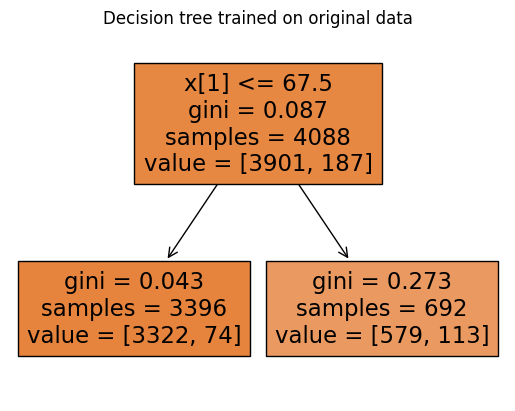

In [ ]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier(**best_1).fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on original data")
plt.show()

### Data Setelah Oversampling

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth':np.arange(1,21).tolist()[0::2],
    'min_samples_split':np.arange(2,11).tolist()[0::2],
    'max_leaf_nodes':np.arange(3,26).tolist()[0::2]
}

# Define the grid search
grid_search_2 = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # number of cross-validation folds
    n_jobs=-1  # use all available CPU cores
)

# Fit the grid search to the data
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search_2.best_params_)


Best hyperparameters:  {'max_depth': 11, 'max_leaf_nodes': 25, 'min_samples_split': 2}


#### Model Training

In [ ]:
best_2 = grid_search_2.best_params_
model_2 = DecisionTreeClassifier(**best_2)
model_2.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi berdasarkan model yang dibentuk
preds_val_2 = model_2.predict(X_valid)

preds_val_2[preds_val_2 > 0.5] = 1
preds_val_2[preds_val_2 <= 0.5] = 0

# Mengubah hasil prediksi menjadi dataframe agar bisa disatukan dengan data awal
stroke_pred = pd.DataFrame(preds_val_2, columns=['stroke_pred'])
stroke_pred.set_index([X_valid.index], inplace = True)

# Mengubah data kembali menjadi bentuk awal yang berisi data kategorikal
X_valid_new = X_valid.copy()
X_valid_new[object_cols] = ordinal_encoder.inverse_transform(X_valid[object_cols])

# Menggabungkan data awal dengan prediksi untuk membandingkan hasil akhir
prediction_2 = pd.concat([ X_valid_new, y_valid, stroke_pred], axis = 1, sort = True)

# Menambahkan kembali kolom id untuk menunjukkan identitas pasien
for i in data:
  if (prediction_2['age'].any() != 'NaN'):
    prediction_2['id'] = data['id']

print(prediction_2)

print(pd.concat([prediction_2['stroke'].value_counts(), prediction_2['stroke_pred'].value_counts()], axis=1))



      gender   age  hypertension  heart_disease ever_married Residence_type  \
8     Female  59.0           0.0            0.0          Yes          Rural   
12    Female  54.0           0.0            0.0          Yes          Urban   
17      Male  75.0           1.0            0.0          Yes          Urban   
19      Male  57.0           0.0            1.0           No          Urban   
23      Male  82.0           0.0            1.0          Yes          Rural   
...      ...   ...           ...            ...          ...            ...   
5096    Male  57.0           0.0            0.0          Yes          Rural   
5100    Male  82.0           1.0            0.0          Yes          Rural   
5105  Female  80.0           1.0            0.0          Yes          Urban   
5106  Female  81.0           0.0            0.0          Yes          Urban   
5107  Female  35.0           0.0            0.0          Yes          Rural   

      avg_glucose_level        bmi smoking_status  

#### Decision Tree

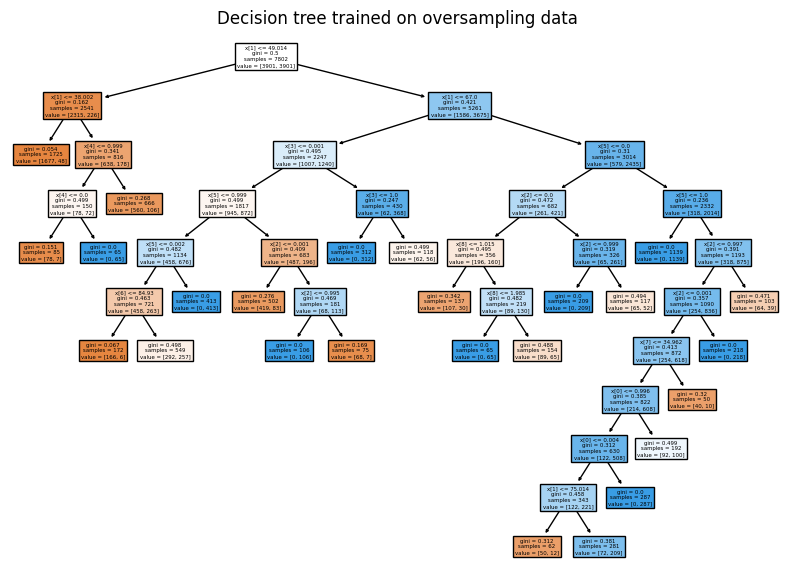

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
clf = DecisionTreeClassifier(**best_2).fit(X_train_resampled, y_train_resampled)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on oversampling data")
plt.show()

## Uji Performa Model

### Statistik (MAE, MSE, Accuracy Score, Classification Report)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

# MODEL 1
print("PERFORMA MODEL DENGAN DATA AWAL")

mae = mean_absolute_error(y_valid, preds_val_1)
mse = mean_squared_error(y_valid, preds_val_1)
acc = accuracy_score(y_valid, preds_val_1)
class_report = classification_report(y_valid, preds_val_1)

print("mean absolute error:", mae, "\nmean squared error:", mse)
print("accuracy score:", acc, "\nclassification report:\n", class_report)

PERFORMA MODEL DENGAN DATA AWAL
mean absolute error: 0.060665362035225046 
mean squared error: 0.060665362035225046
accuracy score: 0.9393346379647749 
classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# MODEL 2
print("PERFORMA MODEL DENGAN DATA SETELAH OVERSAMPLING")

mae = mean_absolute_error(y_valid, preds_val_2)
mse = mean_squared_error(y_valid, preds_val_2)
acc = accuracy_score(y_valid, preds_val_2)
class_report = classification_report(y_valid, preds_val_2)

print("mean absolute error:", mae, "\nmean squared error:", mse)
print("accuracy score:", acc, "\nclassification report:\n", class_report)

PERFORMA MODEL DENGAN DATA SETELAH OVERSAMPLING
mean absolute error: 0.07925636007827788 
mean squared error: 0.07925636007827788
accuracy score: 0.9207436399217221 
classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       960
         1.0       0.15      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.89      0.92      0.91      1022



### ROC Curve & AUC

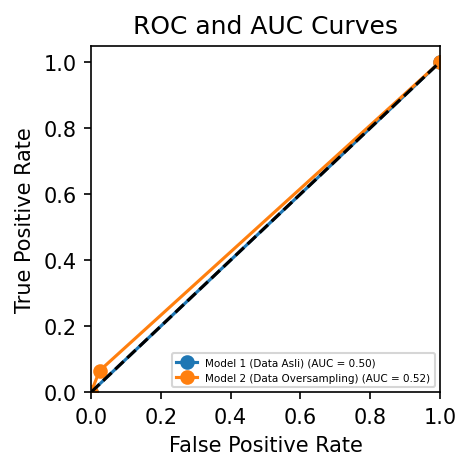

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_1, tpr_1, _ = roc_curve(y_valid, preds_val_1)
auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_valid, preds_val_2)
auc_2 = auc(fpr_2, tpr_2)

plt.figure(figsize=(3,3),dpi=150)
plt.plot(fpr_1, tpr_1, marker='o' ,label='Model 1 (Data Asli) (AUC = %0.2f)' % auc_1)
plt.plot(fpr_2, tpr_2, marker='o',label='Model 2 (Data Oversampling) (AUC = %0.2f)' % auc_2)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC Curves')
plt.legend(loc="lower right",fontsize=5)
plt.show()

### Confusion Matrix

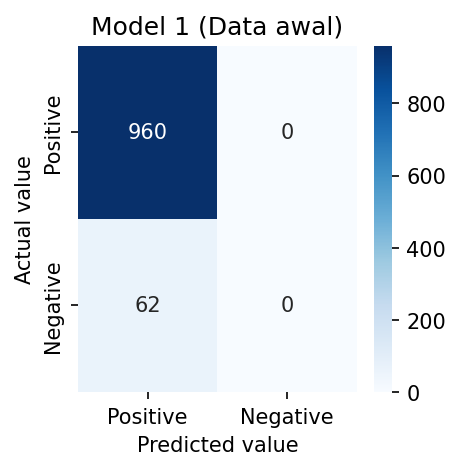

In [ ]:
# MODEL 1 (Data Awal)

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3),dpi=150)
confusion_matrix_rf = confusion_matrix(y_valid, preds_val_1)
sns.heatmap(confusion_matrix_rf,annot=True,xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Blues',fmt='d')

plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title("Model 1 (Data awal)")
plt.show()

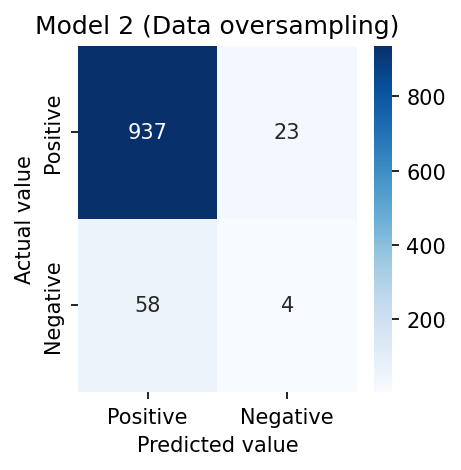

In [ ]:
# MODEL 2 (Data Oversampling)

plt.figure(figsize=(3,3),dpi=150)
confusion_matrix_rf = confusion_matrix(y_valid, preds_val_2)
sns.heatmap(confusion_matrix_rf,annot=True,xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Blues',fmt='d')

plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title("Model 2 (Data oversampling)")
plt.show()

## Kesimpulan

Dari uji performa model yang telah dilakukan, dapat terlihat bahwasanya:
1. Akurasi model 1 (menggunakan data awal) lebih besar dibanding akurasi model 2 (menggunakan data hasil oversampling),
2. Model 2 lebih presisi dalam memprediksi dibanding model 1, hal ini ditunjukkan oleh hasil prediksi dari model 2 yang bervariasi, sehingga bisa menebak untuk kedua jenis kelas, sementara hasil prediksi model 1 hanyalah kelas '0', padahal seharusnya ada kelas '1'
3. Dari ROC dan AUC Curve, terlihat bahwasanya model 2 lebih bagus dibanding model 1
4. Dari confusion matrix, terlihat bahwasanya model 1 menghasilkan lebih banyak True Positive (benar bahwa tebakan kelas 0), tapi model 2 menghasilkan lebih banyak True Negative (benar bahwa tebakan kelas 1). Model 1 juga menghasilkan lebih sedikit tebakan salah, terlihat dari False Negative (salah bahwa tebakan kelas 0) hanya sebesar 62, sementara pada model 2 ada False Negative 58 dan False Positive (salah bahwa tebakan kelas 1) sebesar 23


Secara keseluruhan, model 1 lebih bagus dibanding model 2 karena lebih akurat. Meskipun demikian, adanya ketidakseimbangan ekstrim dalam hasil prediksi akhir yang dihasilkan model 1 (semuanya menghasilkan kelas 0) menunjukkan bahwasanya model yang dihasilkan dapat dikatakan tidak valid dan keakuratannya palsu (karena ada kelas yang jauh lebih dominan), sehingga **diperlukan lebih banyak data, terutama data dari para pasien yang mengidap penyakit stroke** sehingga model yang dihasilkan dapat lebih sesuai dan dapat mempelajari karakteristrik pengidap stroke lebih dalam sehingga dapat mendeteksi & memprediksi pasien lain dengan lebih benar